## 목표 : 숫자 0~9 이미지를 분류

- 데이터셋 : sklearn의 내장 데이터 사용 => load_digit

- 데이터 구성 : 이미지 데이터 + 클래스 (라벨/ 타겟/정답)==> 지도학습

- 학습방법 : 지도학습 중 분류
    
    * LogisticRegression,KNN,DecisionTree,RandomForest,SVC...

    * 분류모델 중 하나 선택


- 구현과정

    * 데이터 준비 + 기본적인 분석

    * 데이터 전처리 ==> 결측치, 중복, 이상치...스케일링

    * 학습준비

        - 데이터 + 타겟 분리
        - 학습준비 ==> 학습용 + 테스트용 + 검증용 데이터 준비

    * 학습

        - 학습모델 객체 생성
        - 학습진행

    * 평가
        - 예측 => 평가
        - 과대적합 또는 과소적합 => 교차검증 및 방법

    * 모델 저장
        - 저장된 모델 활용

## [1] 데이터 준비 및 확인

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt

### [1-1] 데이터 로딩

In [5]:
# Bunch 타입 => 딕셔너리와 유사
digitBunch = load_digits()

In [6]:
digitBunch.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
data=digitBunch['data']
target=digitBunch['target']

In [8]:
type(data), data.shape, type(target), target.shape

(numpy.ndarray, (1797, 64), numpy.ndarray, (1797,))

In [9]:
# 1개의 데이터 확인 => 이미지 8x8 => 64
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
target[0]

0

In [16]:
# 시각화 => 2차원 형태
img_data=data[0].reshape(8,8)

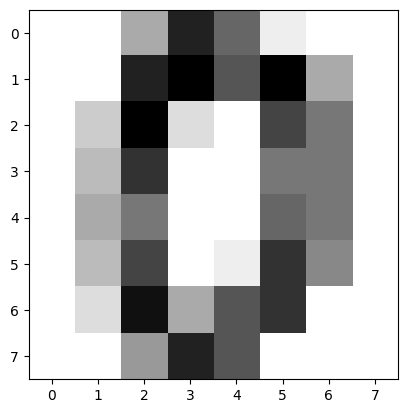

In [17]:
plt.imshow(img_data, cmap='gray_r')

In [14]:
# 수치값 => 0~255 스케일링
scaled_data=data/255

In [18]:
scaled_data.min(),scaled_data.max()

(0.0, 0.06274509803921569)

In [19]:
mmScaler=MinMaxScaler()
mmScaler.fit(data)

MinMaxScaler()

In [22]:
scaled_data1=mmScaler.transform(data)

### [3] 학습준비

In [23]:
# 학습용 / 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(scaled_data1, target)

In [24]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

### [4] 학습

In [43]:
# 모델 객체 생성
knnModel=KNeighborsClassifier()
svcModel=SVC()

In [26]:
knnModel.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
svcModel.fit(X_train,y_train)

SVC()

In [27]:
#학습된 모델 속성 확인
knnModel.n_samples_fit_

1347

In [45]:
svcModel.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### [5] 평가

[5-1]knn

In [30]:
# 학습 데이터 평가
round(knnModel.score(X_train, y_train),4)

0.9933

In [31]:
# 테스트 데이터 평가
round(knnModel.score(X_test,y_test),4)

0.9822

[5-2]svc

In [47]:
# 학습 데이터 평가
round(svcModel.score(X_train, y_train),4)

0.9985

In [48]:
# 테스트 데이터 평가
round(svcModel.score(X_test,y_test),4)

0.9889

In [ ]:
from 

In [ ]:
sorted(result, key=lam)

## [6] 예측

In [34]:
# 새로운 데이터 (학습, 테스트 사용 안함)
new_data=data[-1]
new_data, new_data.shape

(array([ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
         1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
         5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
         0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
         8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.]),
 (64,))

In [37]:
new_data=new_data.reshape(1,-1)
new_data.shape

(1, 64)

In [38]:
# 스케일링 하기
new_data=mmScaler.transform(new_data)

In [39]:
# 예측 => predict()
knnModel.predict(new_data)

array([8])

In [40]:
knnModel.predict_proba(new_data)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

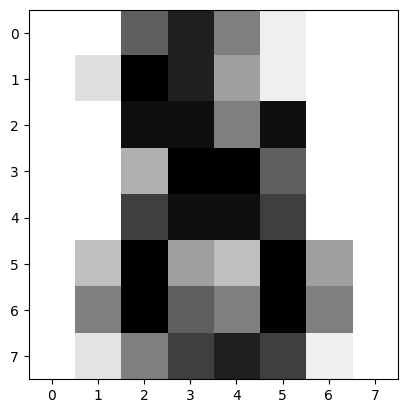

In [42]:
plt.imshow(new_data.reshape(8,8), cmap='gray_r')